### Notebook : Graphique des gains sur année 2023 (01/01/2023 --> 30/11/2023)

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

### Importation des données

In [121]:
dfBTC = pd.read_csv("cotations_BTCUSD.csv", delimiter=";")
dfETH = pd.read_csv("cotations_ETHUSD.csv", delimiter=";")
dfSOL = pd.read_csv("cotations_SOLUSD.csv", delimiter=";")
dfEGLD = pd.read_csv("cotations_EGLDUSD.csv", delimiter=";")
dfAVAX = pd.read_csv("cotations_AVAXUSD.csv", delimiter=";")
dfCOSMOS = pd.read_csv("cotations_COSMOSUSD.csv", delimiter=";")
dfDODGE = pd.read_csv("cotations_DODGEUSD.csv", delimiter=";")
dfFLOW = pd.read_csv("cotations_FLOWUSD.csv", delimiter=";")
dfPOLYGON = pd.read_csv("cotations_POLYGONUSD.csv", delimiter=";")
dfTHETA = pd.read_csv("cotations_THETAUSD.csv", delimiter=";")

### Traitement des données

In [122]:
################## BTC #####################
dfBTC['courscloture'] = dfBTC['courscloture'].str.replace(',', '.').astype(float)
dfBTC['date'] = pd.to_datetime(dfBTC['date'], format='%d/%m/%Y')
dfBTC = dfBTC.sort_values(by='date')

################## ETH #####################
dfETH['courscloture'] = dfETH['courscloture'].str.replace(',', '.').astype(float)
dfETH['date'] = pd.to_datetime(dfETH['date'], format='%d/%m/%Y')
dfETH = dfETH.sort_values(by='date')

################## EGLD #####################
dfEGLD['courscloture'] = dfEGLD['courscloture'].str.replace(',', '.').astype(float)
dfEGLD['date'] = pd.to_datetime(dfEGLD['date'], format='%d/%m/%Y')
dfEGLD = dfEGLD.sort_values(by='date')

################## SOL #####################
dfSOL['courscloture'] = dfSOL['courscloture'].str.replace(',', '.').astype(float)
dfSOL['date'] = pd.to_datetime(dfSOL['date'], format='%d/%m/%Y')
dfSOL = dfSOL.sort_values(by='date')

################## AVAX #####################
dfAVAX['courscloture'] = dfAVAX['courscloture'].str.replace(',', '.').astype(float)
dfAVAX['date'] = pd.to_datetime(dfAVAX['date'], format='%d/%m/%Y')
dfAVAX = dfAVAX.sort_values(by='date')

################## DODGE #####################
dfDODGE['courscloture'] = dfDODGE['courscloture'].str.replace(',', '.').astype(float)
dfDODGE['date'] = pd.to_datetime(dfDODGE['date'], format='%d/%m/%Y')
dfDODGE = dfDODGE.sort_values(by='date')

################## COSMOS #####################
dfCOSMOS['courscloture'] = dfCOSMOS['courscloture'].str.replace(',', '.').astype(float)
dfCOSMOS['date'] = pd.to_datetime(dfCOSMOS['date'], format='%d/%m/%Y')
dfCOSMOS = dfCOSMOS.sort_values(by='date')

################## FLOW #####################
dfFLOW['courscloture'] = dfFLOW['courscloture'].str.replace(',', '.').astype(float)
dfFLOW['date'] = pd.to_datetime(dfFLOW['date'], format='%d/%m/%Y')
dfFLOW = dfFLOW.sort_values(by='date')

################## THETA #####################
dfTHETA['courscloture'] = dfTHETA['courscloture'].str.replace(',', '.').astype(float)
dfTHETA['date'] = pd.to_datetime(dfTHETA['date'], format='%d/%m/%Y')
dfTHETA = dfTHETA.sort_values(by='date')

################## POLYGON #####################
dfPOLYGON['courscloture'] = dfPOLYGON['courscloture'].str.replace(',', '.').astype(float)
dfPOLYGON['date'] = pd.to_datetime(dfPOLYGON['date'], format='%d/%m/%Y')
dfPOLYGON = dfPOLYGON.sort_values(by='date')

In [69]:
dfBTC

,crypto,date,courscloture
0,btc,2023-01-01,15528.42383
1,btc,2023-01-02,15630.73926
2,btc,2023-01-03,15817.34180
3,btc,2023-01-04,15899.84180
4,btc,2023-01-05,16002.54395
...,...,...,...
329,btc,2023-11-26,34529.25781
330,btc,2023-11-27,34259.40234
331,btc,2023-11-28,33993.83203
332,btc,2023-11-29,34379.07422


### Premier graph simple

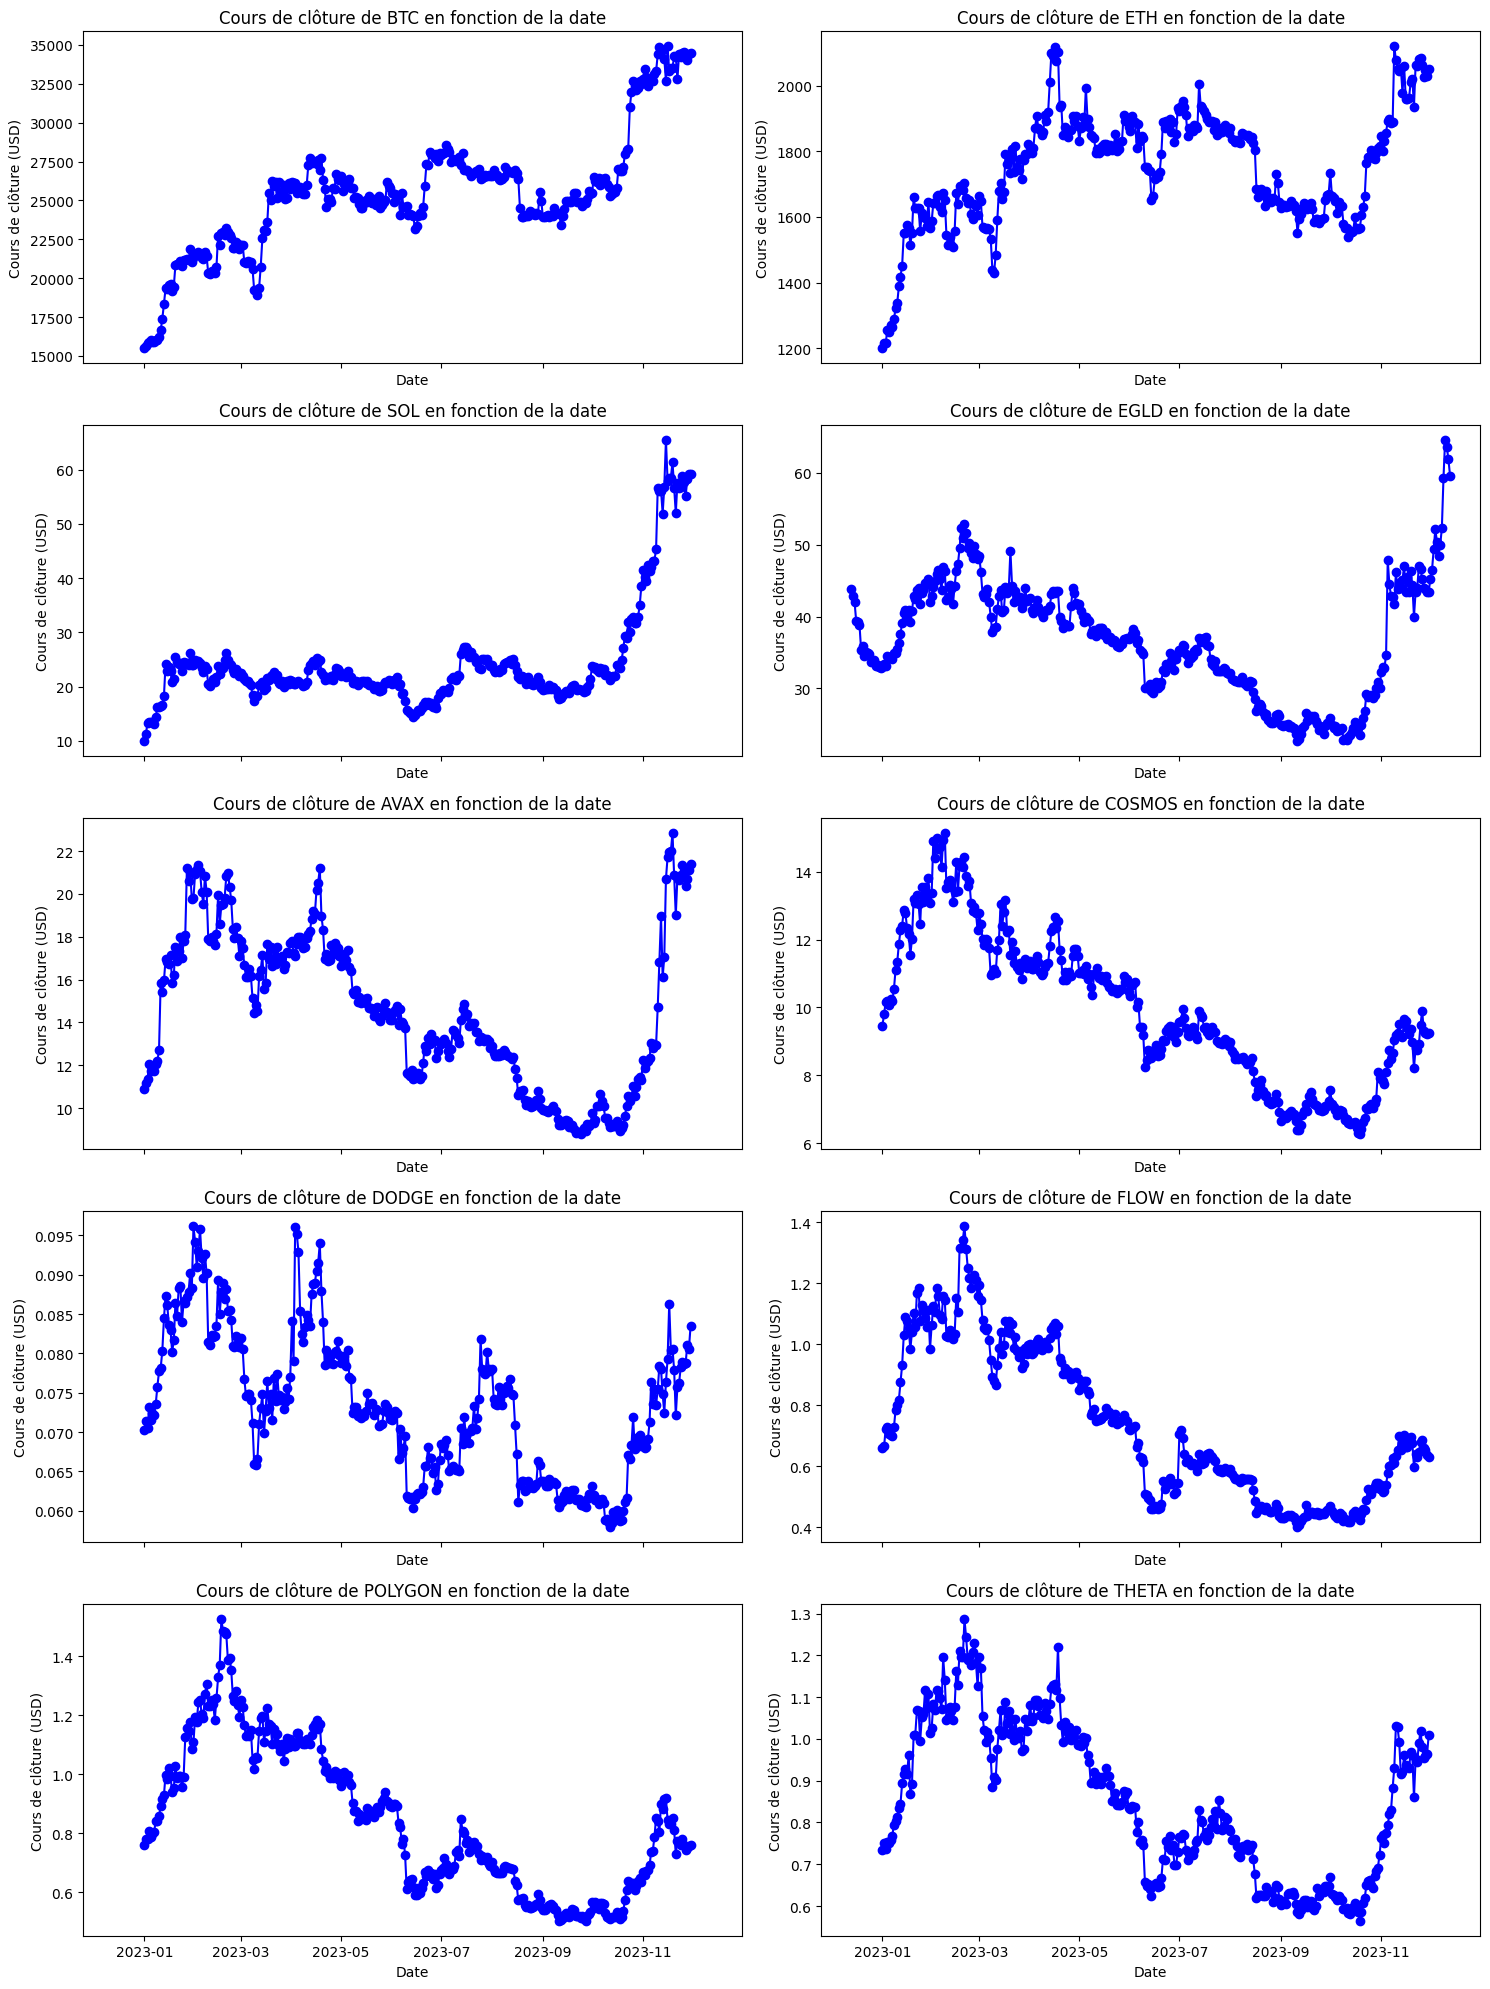

In [70]:
# Créer une figure et une grille de sous-graphiques
fig, axs = plt.subplots(5, 2, figsize=(15, 20), sharex=True)

# Liste des dataframes
df_list = [dfBTC, dfETH, dfSOL, dfEGLD, dfAVAX, dfCOSMOS, dfDODGE, dfFLOW, dfPOLYGON, dfTHETA]

# Liste des noms des crypto-monnaies
crypto_names = ['BTC', 'ETH', 'SOL', 'EGLD', 'AVAX', 'COSMOS', 'DODGE', 'FLOW', 'POLYGON', 'THETA']

# Boucle pour créer et afficher chaque graphique
for i in range(5):
    for j in range(2):
        index = i * 2 + j
        axs[i, j].plot(df_list[index]['date'], df_list[index]['courscloture'], marker='o', linestyle='-', color='b')
        axs[i, j].set_title(f'Cours de clôture de {crypto_names[index]} en fonction de la date')
        axs[i, j].set_xlabel('Date')
        axs[i, j].set_ylabel('Cours de clôture (USD)')

# Ajuster la disposition et les espacements
plt.tight_layout()
plt.show()

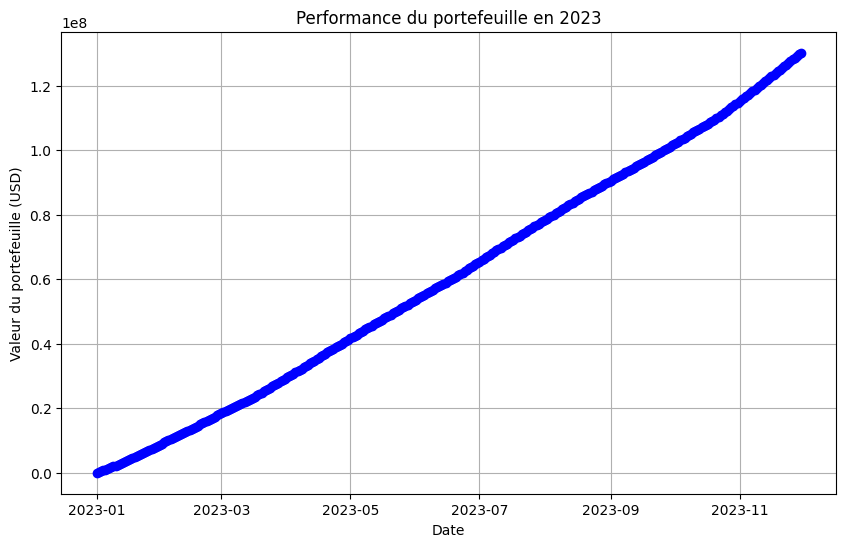

In [71]:
# Fusionner les dataframes sur la colonne 'date'
df_merged = pd.merge(dfBTC[['date', 'courscloture']], dfETH[['date', 'courscloture']], on='date', suffixes=('_BTC', '_ETH'))

# Définir les dates comme index
df_merged['date'] = pd.to_datetime(df_merged['date'])
df_merged.set_index('date', inplace=True)

# Sélectionner les données pour l'année 2023
df_merged = df_merged['2023-01-01':'2023-11-30']

# Schéma d'investissement
investment_scheme = {'BTC': 0.75, 'ETH': 0.25}

# Montant d'investissement chaque dimanche
investment_amount = 20

# Initialiser le portefeuille avec la valeur du premier investissement
df_merged['portfolio_value'] = 0
df_merged.loc[df_merged.index[0], 'portfolio_value'] = 20

# Liste pour stocker la valeur du portefeuille chaque semaine
portfolio_values = [20]

# Boucle pour chaque dimanche de l'année, en commençant par la deuxième semaine
for i in range(1, len(df_merged)):
    # Calculer la valeur du portefeuille
    weekly_portfolio_value = portfolio_values[i-1] + \
                             (investment_scheme['BTC'] * investment_amount * df_merged.iloc[i]['courscloture_BTC']) + \
                             (investment_scheme['ETH'] * investment_amount * df_merged.iloc[i]['courscloture_ETH'])
    
    # Ajouter la valeur du portefeuille à la liste
    portfolio_values.append(weekly_portfolio_value)

# Ajouter la liste des valeurs du portefeuille au dataframe
df_merged['portfolio_value'] = portfolio_values

# Tracer la performance du portefeuille au fil du temps
plt.figure(figsize=(10, 6))
plt.plot(df_merged.index, df_merged['portfolio_value'], marker='o', linestyle='-', color='b')
plt.title('Performance du portefeuille en 2023')
plt.xlabel('Date')
plt.ylabel('Valeur du portefeuille (USD)')
plt.grid(True)
plt.show()

### Pour un investisseur SEREIN du 01/01/2023 au 30/11/2023

In [114]:
df_merged = pd.merge(dfBTC[['date', 'courscloture']], dfETH[['date', 'courscloture']], on='date', suffixes=('_BTC', '_ETH'))

df_merged['date'] = pd.to_datetime(df_merged['date'])
df_merged.set_index('date', inplace=True)

df_merged = df_merged['2023-01-01':'2023-11-30']
investment_scheme = {'BTC': 0.75, 'ETH': 0.25}
investment_amount = 20

df_merged['portfolio_value'] = 0
df_merged.loc[df_merged.index[0], 'portfolio_value'] = 20
df_merged['day_of_year'] = df_merged.index.dayofyear

portfolio_values = [20]
nbr_btc_portfolio = [0]

nbr_btc_portfolio = [investment_scheme['BTC'] * investment_amount / df_merged.iloc[0]['courscloture_BTC']]  # 15$ / 15528,42383$ = 0.0009659705430644471 btc
nbr_eth_portfolio = [investment_scheme['ETH'] * investment_amount / df_merged.iloc[0]['courscloture_ETH']]  # 5$ / 1200,964844$ = 0,004163319205370511 eth

condition = (df_merged['day_of_year'] % 8 == 0)

for i in range(1, len(df_merged)):
    if condition.iloc[i]:
        nbr_btc_portfolio.append(nbr_btc_portfolio[i-1] + (investment_scheme['BTC'] * investment_amount / df_merged.iloc[i]['courscloture_BTC']))
        nbr_eth_portfolio.append(nbr_eth_portfolio[i-1] + (investment_scheme['ETH'] * investment_amount / df_merged.iloc[i]['courscloture_ETH']))
        
        weekly_portfolio_value = nbr_btc_portfolio[i] * df_merged.iloc[i]['courscloture_BTC'] + \
                                    nbr_eth_portfolio[i] * df_merged.iloc[i]['courscloture_ETH']
    else:
        nbr_btc_portfolio.append(nbr_btc_portfolio[i-1])
        nbr_eth_portfolio.append(nbr_eth_portfolio[i-1])
        weekly_portfolio_value = nbr_btc_portfolio[i] * df_merged.iloc[i]['courscloture_BTC'] + \
                                    nbr_eth_portfolio[i] * df_merged.iloc[i]['courscloture_ETH']

    portfolio_values.append(weekly_portfolio_value)

df_merged['portfolio_value'] = portfolio_values
df_merged['nbr_btc'] = nbr_btc_portfolio
df_merged['nbr_eth'] = nbr_eth_portfolio

total_investment = investment_amount * condition.sum()
total_value_portfolio = df_merged['portfolio_value'].iloc[-1]  # end of November 2023
profit = df_merged['portfolio_value'].iloc[-1] - total_investment

print(f"Montant total investi: {round(total_investment, 2)} USD")
print(f"Montant portefeuille fin Novembre 2023: {round(total_value_portfolio,2)} USD")
print(f"Bénéfice à la fin de l'année: {round(profit,2)} USD")

Montant total investi: 820 USD
Montant portefeuille fin Novembre 2023: 1136.11 USD
Bénéfice à la fin de l'année: 316.11 USD


### Pour un investisseur PRECAUTIONNEUX du 01/01/2023 au 30/11/2023

In [143]:
df_merged = pd.merge(dfBTC[['date', 'courscloture']], dfETH[['date', 'courscloture']], on='date', suffixes=('_BTC', '_ETH'))
df_merged = pd.merge(df_merged, dfAVAX[['date', 'courscloture']], on='date', suffixes=('', 'AVAX'))
df_merged = df_merged.rename(columns={'courscloture': 'courscloture_AVAX'})
df_merged = pd.merge(df_merged, dfSOL[['date', 'courscloture']], on='date', suffixes=('', '_SOL'))
df_merged = df_merged.rename(columns={'courscloture': 'courscloture_SOL'})

df_merged['date'] = pd.to_datetime(df_merged['date'])
df_merged.set_index('date', inplace=True)

df_merged = df_merged['2023-01-01':'2023-11-30']
investment_scheme = {'BTC': 0.6, 'ETH': 0.3, 'AVAX': 0.05, 'SOL': 0.05}
investment_amount = 20

df_merged['portfolio_value'] = 0
df_merged.loc[df_merged.index[0], 'portfolio_value'] = 20
df_merged['day_of_year'] = df_merged.index.dayofyear

portfolio_values = [20]
nbr_btc_portfolio = [0]

nbr_btc_portfolio = [investment_scheme['BTC'] * investment_amount / df_merged.iloc[0]['courscloture_BTC']]  # 15$ / 15528,42383$ = 0.0009659705430644471 btc
nbr_eth_portfolio = [investment_scheme['ETH'] * investment_amount / df_merged.iloc[0]['courscloture_ETH']]  # 5$ / 1200,964844$ = 0,004163319205370511 eth
nbr_avax_portfolio = [investment_scheme['AVAX'] * investment_amount / df_merged.iloc[0]['courscloture_AVAX']]  # 5$ / 1200,964844$ = 0,004163319205370511 eth
nbr_sol_portfolio = [investment_scheme['SOL'] * investment_amount / df_merged.iloc[0]['courscloture_SOL']]  # 1$ / 9,982173$ = 0,004163319205370511 eth

condition = (df_merged['day_of_year'] % 8 == 0)

for i in range(1, len(df_merged)):
    if condition.iloc[i]:
        nbr_btc_portfolio.append(nbr_btc_portfolio[i-1] + (investment_scheme['BTC'] * investment_amount / df_merged.iloc[i]['courscloture_BTC']))
        nbr_eth_portfolio.append(nbr_eth_portfolio[i-1] + (investment_scheme['ETH'] * investment_amount / df_merged.iloc[i]['courscloture_ETH']))
        nbr_avax_portfolio.append(nbr_avax_portfolio[i-1] + (investment_scheme['AVAX'] * investment_amount / df_merged.iloc[i]['courscloture_AVAX']))
        nbr_sol_portfolio.append(nbr_sol_portfolio[i-1] + (investment_scheme['SOL'] * investment_amount / df_merged.iloc[i]['courscloture_SOL']))

        weekly_portfolio_value = nbr_btc_portfolio[i] * df_merged.iloc[i]['courscloture_BTC'] + \
                                    nbr_eth_portfolio[i] * df_merged.iloc[i]['courscloture_ETH'] + \
                                    nbr_avax_portfolio[i] * df_merged.iloc[i]['courscloture_AVAX'] + \
                                    nbr_sol_portfolio[i] * df_merged.iloc[i]['courscloture_SOL']
    else:
        nbr_btc_portfolio.append(nbr_btc_portfolio[i-1])
        nbr_eth_portfolio.append(nbr_eth_portfolio[i-1])
        nbr_avax_portfolio.append(nbr_avax_portfolio[i-1])
        nbr_sol_portfolio.append(nbr_sol_portfolio[i-1])
        weekly_portfolio_value = nbr_btc_portfolio[i] * df_merged.iloc[i]['courscloture_BTC'] + \
                                    nbr_eth_portfolio[i] * df_merged.iloc[i]['courscloture_ETH'] + \
                                    nbr_avax_portfolio[i] * df_merged.iloc[i]['courscloture_AVAX'] + \
                                    nbr_sol_portfolio[i] * df_merged.iloc[i]['courscloture_SOL']

    portfolio_values.append(weekly_portfolio_value)

df_merged['portfolio_value'] = portfolio_values
df_merged['nbr_btc'] = nbr_btc_portfolio
df_merged['nbr_eth'] = nbr_eth_portfolio
df_merged['nbr_avax'] = nbr_avax_portfolio
df_merged['nbr_sol'] = nbr_sol_portfolio



total_investment = investment_amount * condition.sum()
total_value_portfolio = df_merged['portfolio_value'].iloc[-1]  # end of November 2023
profit = df_merged['portfolio_value'].iloc[-1] - total_investment

print(f"Montant total investi: {round(total_investment, 2)} USD")
print(f"Montant portefeuille fin Novembre 2023: {round(total_value_portfolio,2)} USD")
print(f"Bénéfice à la fin de l'année: {round(profit,2)} USD")

Montant total investi: 820 USD
Montant portefeuille fin Novembre 2023: 1190.3 USD
Bénéfice à la fin de l'année: 370.3 USD
